### 생선 분류 - 최적의 K 찾기: 하이퍼파라미터(모델의 성능에 영향을 끼치는 파라미터)
- 데이터셋: fish.csv
- 피쳐/특성: Weight, Length
- 타겟/라벨: Species
- 학습방법: 지도학습=> 분류
- 학습알고리즘: 최근접이웃알고리즘(KNN)
- 하이퍼파라미터 튜닝: 모델 성능 개선

[1] 데이터 준비


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
Data_File= '../data/fish.csv'


In [42]:
# 행: Bream, Smelt
# 컬럼: 0,1,2
fishDF= pd.read_csv(Data_File, usecols=[0,1,2])
fishDF.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [43]:
mask= (fishDF['Species']== 'Bream') | (fishDF['Species']=='Smelt')
twofish_DF= fishDF[mask][:]
twofish_DF.reset_index(drop=True, inplace=True)
print(twofish_DF.head(3), twofish_DF.index)


  Species  Weight  Length
0   Bream   242.0    25.4
1   Bream   290.0    26.3
2   Bream   340.0    26.5 RangeIndex(start=0, stop=49, step=1)


In [44]:
# Species 데이터 수치화=> Bream=0, Smelt=1
twofish_DF['spc_num']=twofish_DF['Species'].replace({'Bream':0, 'Smelt':1})
print(twofish_DF.head())

  Species  Weight  Length  spc_num
0   Bream   242.0    25.4        0
1   Bream   290.0    26.3        0
2   Bream   340.0    26.5        0
3   Bream   363.0    29.0        0
4   Bream   430.0    29.0        0


[2] 피쳐와 타겟 분리

In [45]:
features= twofish_DF[['Weight', 'Length']]
target= twofish_DF['spc_num']

print(f'features= {features.shape}, {features.ndim}')

print(f'target= {target.shape}, {target.ndim}')

features= (49, 2), 2
target= (49,), 1


[3] 학습용, 테스트용 데이터셋 준비

In [46]:
from sklearn.model_selection import train_test_split


In [47]:
# train:test=80:20 --> test_size=0.2 or train_size=0.8
# stratify(분류일 때)-> 주어진 타겟 데이터의 종류 비율을 고려
X_train, Xtest, Y_train, Y_test= train_test_split(features, target, test_size=.2, 
                                                  stratify=target, random_state=10)

In [48]:
print(f'x_train: {X_train.shape}, {X_train.ndim}')
print(f'Y_train: {Y_train.shape}, {Y_train.ndim}')
print(f'Xtest: {Xtest.shape}, {Xtest.ndim}')
print(f'Y_test: {Y_test.shape}, {Y_test.ndim}')

x_train: (39, 2), 2
Y_train: (39,), 1
Xtest: (10, 2), 2
Y_test: (10,), 1


In [49]:
# target의 비율
print(Y_train.value_counts()[0]/Y_train.shape[0])
print(Y_train.value_counts()[1]/Y_train.shape[0])

# test의 비율
print(Y_test.value_counts()[0]/Y_test.shape[0])
print(Y_test.value_counts()[1]/Y_test.shape[0])


0.717948717948718
0.28205128205128205
0.7
0.3


[3-2] 피쳐 스케일링

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
# 스케일러 인스턴스 생성
mmscaler= MinMaxScaler()


In [52]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmscaler.fit(X_train)

MinMaxScaler()

In [53]:
mmscaler.min_, mmscaler.data_min_, mmscaler.scale_, mmscaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [54]:
# data-> 실제 데이터, scale-> 스케일링을 위한 기준값 (공식있음)
X_train.min(), X_train.max()

(Weight    6.7
 Length    9.8
 dtype: float64,
 Weight    1000.0
 Length      41.0
 dtype: float64)

In [55]:
# 학습용 데이터셋 스케일링

X_train_scaled= mmscaler.transform(X_train) #-> ndarray
X_train_scaled.shape
 

(39, 2)

In [56]:
# 테스트용 데이터셋 스케일링
Xtest_scaled= mmscaler.transform(Xtest)  #->ndarray
Xtest_scaled.shape

(10, 2)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행=>fit()


In [57]:
from sklearn.neighbors import KNeighborsClassifier


In [58]:
# 인스턴스 생성
model= KNeighborsClassifier()


In [59]:
# 학습 진행==> 학습용 데이터셋 사용
model.fit(X_train_scaled, Y_train)   #->ndarray 형태라 컬럼명 X

KNeighborsClassifier()

In [60]:
# 학습 후 모델 파라미터 
model.classes_,model.feature_names_in_, model.n_samples_fit_   
#(컬럼명 없음)AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_names_in_'

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_names_in_'

[5] 모델 성능평가 ==> score메서드+ test데이터셋


In [ ]:
model.score(Xtest_scaled,Y_test)

1.0

[6] 최적의 K 개수 찾기 ==> 모델의 성능 영향 미치는 파라미터
- 하이퍼파라미터

In [ ]:
# K의 범위: 1~전체 데이터 개수

scores, points=[], []
for k in range(1,40):
    # 최근접 이웃 데이터 수 설정
    model.n_neighbors= k

    # 모델 예측 값 추출
    model.fit(X_train_scaled, Y_train)

    #점수 계산 및 저장
    jumsu= model.score(Xtest_scaled, Y_test)

    # 이전 점수와의 차이있는 k지점 저장
    if k>=2:
        if jumsu!= scores[-1]:
            points.append(k)

    # print(f'[{k}] jumsu= {jumsu}')
    scores.append(jumsu)
    print(jumsu)
print(points)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
0.7
[22]


Text(0, 0.5, 'jumsu')

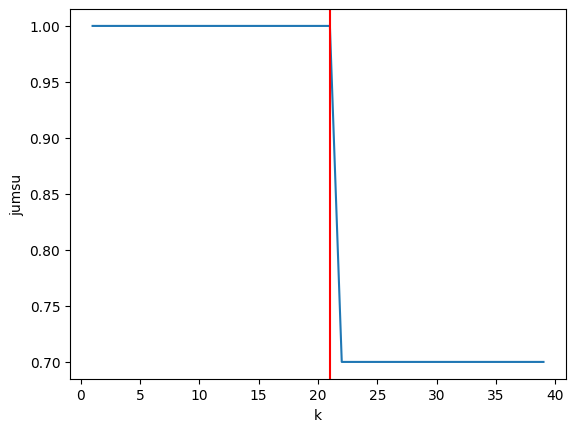

In [63]:
# x축=k, y축=jumsu
plt.plot(range(1,40), scores)
plt.axvline(points[0]-1, 0, 1, color='r')
plt.xlabel('k')
plt.ylabel('jumsu')

[7] 예측 하기==> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의: 입력 데이터가 2D형태이어야 함!

In [ ]:
new_data= [[413, 27.8]]
model.predict(new_data)
# UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
# warnings.warn(  ---> 피처의 컬럼명 없어서 생긴 요류(DF로 컬럼명 넣으면 됨or ndarray형태로 전달)

c:\Users\KDP-25\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
# 오류(future Warning) 해결
new_data= pd.DataFrame([[413, 27.8]], columns=['Weight', 'Length'])

In [ ]:
new_data_scaled= mmscaler.transform(new_data)
print(model.predict(new_data_scaled))
print(new_data_scaled)

[0]
[[0.40904057 0.57692308]]
[0.42615524 0.35870331 0.44629014 0.38588543 0.44629014]
[0.61538462 0.61538462 0.63782051 0.6474359  0.6474359 ]


In [ ]:
# 최근접한 k개 데이터 찾기
distance, index=model.kneighbors(new_data_scaled)  #-> distance와 index 반환
print(distance, index)
# index가 2D이므로 1D로 변환후 검색
neighbers= index.reshape(-1).tolist()
print(index.reshape(-1).tolist())


# 스케일된 데이터에서 최근접한 k개 데이터
print(X_train_scaled[neighbers][:,0])
K_weight=X_train_scaled[neighbers][:,0]
K_length= X_train_scaled[neighbers][:,1]
print(K_length)

[[0.04209753 0.06334927 0.07138647 0.07421737 0.07974703]] [[25 22 21  0  6]]
[25, 22, 21, 0, 6]
[0.42615524 0.35870331 0.44629014 0.38588543 0.44629014]
[0.61538462 0.61538462 0.63782051 0.6474359  0.6474359 ]


In [ ]:
X_train_scaled[:,0], X_train_scaled[:,1] #weight, length

(array([3.85885432e-01, 3.12091010e-03, 2.85210913e-01, 5.53709856e-03,
        9.54696466e-01, 1.32890365e-02, 4.46290144e-01, 1.00000000e+00,
        0.00000000e+00, 6.97976442e-01, 4.71458774e-01, 6.47639183e-01,
        4.96627404e-01, 3.02023558e-04, 6.82875264e-01, 3.12091010e-03,
        7.18111346e-01, 3.35548173e-01, 9.24494111e-01, 3.02023558e-03,
        6.74519279e-03, 4.46290144e-01, 3.58703312e-01, 6.07369375e-01,
        6.77841538e-01, 4.26155240e-01, 6.97976442e-01, 3.22158462e-03,
        2.01349039e-03, 4.96627404e-01, 5.72133293e-01, 6.17436827e-01,
        8.05396154e-04, 5.97301923e-01, 9.74831370e-01, 9.19460385e-01,
        4.96627404e-01, 3.35548173e-01, 9.49662740e-01]),
 array([0.6474359 , 0.07051282, 0.52884615, 0.1025641 , 0.91987179,
        0.16666667, 0.6474359 , 0.87179487, 0.        , 0.74358974,
        0.67948718, 0.75961538, 0.69551282, 0.02564103, 0.77564103,
        0.04487179, 0.80769231, 0.53525641, 0.95192308, 0.03846154,
        0.08333333, 0.

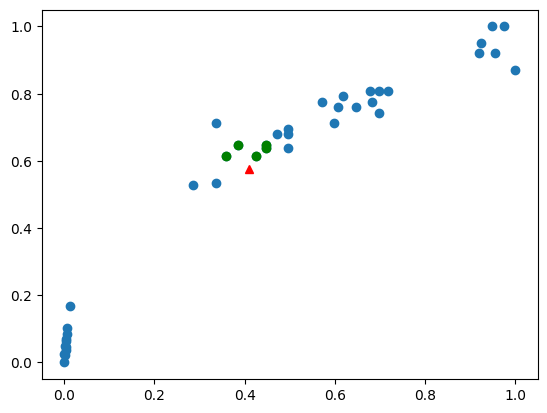

In [ ]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.plot(new_data_scaled[0,0], new_data_scaled[0,1], 'r^')
plt.plot(K_weight, K_length, 'go')

# 정규화 후 근접한 데이터가 훨씬 가까워짐

In [ ]:
from sklearn import datasets

ValueError: Per-column arrays must each be 1-dimensional